In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Из всех зачений в format только 1 не пустое, а в shape - 2**

In [2]:
data = sparse.load_npz("train.npz")

In [12]:
max_clusters = 15
distance = []

for k in tqdm(range(1, max_clusters + 1)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    distance.append(kmeans.inertia_)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:18<00:00, 29.26s/it]


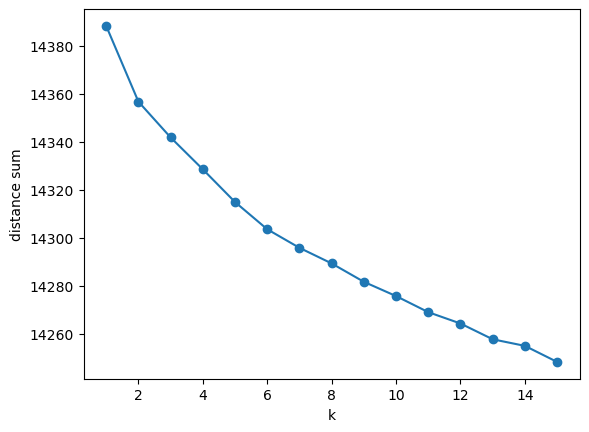

In [15]:
plt.plot(range(1, max_clusters+1), distance, marker='o')
plt.xlabel('k')
plt.ylabel('distance sum')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
submission = pd.DataFrame({"ID": range(0, data.shape[0]), "TARGET": kmeans.labels_})
submission.to_csv('submission.csv', index=False)
submission.head(3)

,ID,TARGET
0,0,1
1,1,1
2,2,1


In [7]:
silhouette_scores = []

for n_clusters in tqdm(range(2, 16)):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

  7%|█████▉                                                                             | 1/14 [00:16<03:33, 16.44s/it]C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 14%|███████████▊                                                                       | 2/14 [00:35<03:33, 17.76s/it]C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 21%|█████████████████▊                                                                 | 3/14 [00:59<03:47, 20.65s/it]C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

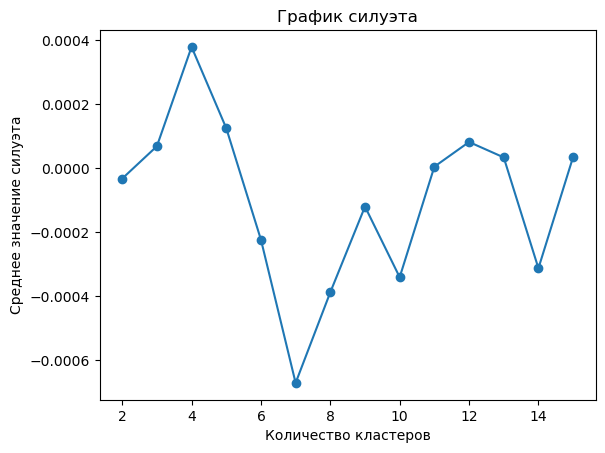

In [8]:
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее значение силуэта')
plt.title('График силуэта')
plt.show()
